In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, isnan, count, mean, when
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from pyspark.sql import SparkSession

# Initialize Spark session (if not already created)
spark = SparkSession.builder.appName("EcommerceCustomerData").getOrCreate()

# Load the datasets
path1 = "dbfs:/FileStore/shared_uploads/reddiiaravind@gmail.com/ecommerce_customer_data_custom_ratios-2.csv"
path2 = "dbfs:/FileStore/shared_uploads/reddiiaravind@gmail.com/ecommerce_customer_data_large-2.csv"

# Read CSV files into DataFrames
df_custom_ratios = spark.read.csv(path1, header=True, inferSchema=True)
df_large = spark.read.csv(path2, header=True, inferSchema=True)

# Show the first few rows of each DataFrame
print("Dataset 1: Custom Ratios")
df_custom_ratios.show(5)

print("Dataset 2: Large Dataset")
display(df_large)

Dataset 1: Custom Ratios
+-----------+-------------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------------+---+------+-----+
|Customer ID|      Purchase Date|Product Category|Product Price|Quantity|Total Purchase Amount|Payment Method|Customer Age|Returns|      Customer Name|Age|Gender|Churn|
+-----------+-------------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------------+---+------+-----+
|      46251|2020-09-08 09:38:32|     Electronics|           12|       3|                  740|   Credit Card|          37|    0.0|Christine Hernandez| 37|  Male|    0|
|      46251|2022-03-05 12:56:35|            Home|          468|       4|                 2739|        PayPal|          37|    0.0|Christine Hernandez| 37|  Male|    0|
|      46251|2022-05-23 18:18:01|            Home|          288|       2|                 3196|        PayPal|          37|    0.0

Customer ID Purchase Date Product Category Product Price Quantity Total Purchase Amount Payment Method Customer Age Returns Customer Name Age Gender Churn 44605 2023-05-03T21:30:02.000+0000 Home 177 1 2427 PayPal 31 1.0 John Rivera 31 Female 0 44605 2021-05-16T13:57:44.000+0000 Electronics 174 3 2448 PayPal 31 1.0 John Rivera 31 Female 0 44605 2020-07-13T06:16:57.000+0000 Books 413 1 2345 Credit Card 31 1.0 John Rivera 31 Female 0 44605 2023-01-17T13:14:36.000+0000 Electronics 396 3 937 Cash 31 0.0 John Rivera 31 Female 0 44605 2021-05-01T11:29:27.000+0000 Books 259 4 2598 PayPal 31 1.0 John Rivera 31 Female 0 13738 2022-08-25T06:48:33.000+0000 Home 191 3 3722 Credit Card 27 1.0 Lauren Johnson 27 Female 0 13738 2023-07-25T05:17:24.000+0000 Electronics 205 1 2773 Credit Card 27 null Lauren Johnson 27 Female 0 13738 2023-02-05T19:31:48.000+0000 Books 370 5 1486 Cash 27 1.0 Lauren Johnson 27 Female 0 13738 2021-12-21T03:29:05.000+0000 Home 12 2 2175 Cash 27 null Lauren Johnson 27 Female 0 13738 2023-02-09T00:53:14.000+0000 Electronics 40 4 4327 Cash 27 0.0 Lauren Johnson 27 Female 0 33969 2023-02-28T19:58:23.000+0000 Clothing 410 3 5018 Credit Card 27 null Carol Allen 27 Male 0 33969 2023-01-05T11:15:27.000+0000 Home 304 1 3883 PayPal 27 1.0 Carol Allen 27 Male 0 33969 2023-07-18T23:36:50.000+0000 Books 54 2 4187 PayPal 27 0.0 Carol Allen 27 Male 0 33969 2021-12-20T23:44:57.000+0000 Electronics 428 4 2289 Cash 27 0.0 Carol Allen 27 Male 0 33969 2020-03-07T21:31:35.000+0000 Books 281 1 3810 Cash 27 0.0 Carol Allen 27 Male 0 33969 2022-07-21T04:25:44.000+0000 Home 193 2 3198 Credit Card 27 0.0 Carol Allen 27 Male 0 33969 2023-07-05T15:01:04.000+0000 Clothing 473 3 2881 Credit Card 27 1.0 Carol Allen 27 Male 0 42650 2020-10-18T23:38:52.000+0000 Books 127 5 3347 Cash 20 0.0 Curtis Smith 20 Female 0 42650 2020-05-17T17:02:36.000+0000 Home 284 2 3531 Credit Card 20 1.0 Curtis Smith 20 Female 0 42650 2022-03-18T13:52:08.000+0000 Electronics 256 2 3548 Credit Card 20 0.0 Curtis Smith 20 Female 0 42650 2021-04-21T07:58:37.000+0000 Clothing 252 2 1775 Credit Card 20 1.0 Curtis Smith 20 Female 0 42650 2022-01-26T12:50:30.000+0000 Electronics 105 2 3721 Credit Card 20 null Curtis Smith 20 Female 0 42650 2020-11-11T07:19:18.000+0000 Electronics 193 2 3266 PayPal 20 1.0 Curtis Smith 20 Female 0 42650 2023-04-29T23:31:47.000+0000 Home 43 1 2312 Cash 20 0.0 Curtis Smith 20 Female 0 42650 2022-07-04T16:04:01.000+0000 Home 30 5 642 PayPal 20 1.0 Curtis Smith 20 Female 0 42650 2021-08-01T05:27:13.000+0000 Electronics 30 3 5024 Credit Card 20 1.0 Curtis Smith 20 Female 0 42650 2020-05-24T06:45:48.000+0000 Electronics 307 3 973 PayPal 20 null Curtis Smith 20 Female 0 42650 2022-03-24T00:05:26.000+0000 Electronics 254 1 3865 PayPal 20 0.0 Curtis Smith 20 Female 0 42650 2022-09-02T04:00:49.000+0000 Books 12 3 3112 Cash 20 1.0 Curtis Smith 20 Female 0 42650 2021-11-14T10:23:14.000+0000 Books 66 3 250 PayPal 20 1.0 Curtis Smith 20 Female 0 24053 2020-11-17T13:14:27.000+0000 Electronics 102 2 5206 Credit Card 53 1.0 Jose Green 53 Male 0 24053 2021-05-07T09:54:22.000+0000 Books 187 5 629 PayPal 53 1.0 Jose Green 53 Male 0 24053 2022-09-07T05:06:52.000+0000 Books 86 1 843 Credit Card 53 1.0 Jose Green 53 Male 0 24053 2020-07-05T06:30:39.000+0000 Electronics 364 3 1008 Credit Card 53 0.0 Jose Green 53 Male 0 24053 2022-01-11T10:56:31.000+0000 Books 210 2 4567 Credit Card 53 0.0 Jose Green 53 Male 0 19676 2022-01-12T22:49:28.000+0000 Clothing 304 3 4869 PayPal 57 1.0 Linda Lee 57 Male 0 19676 2021-06-26T23:49:18.000+0000 Electronics 329 1 3391 Cash 57 1.0 Linda Lee 57 Male 0 19676 2022-06-30T06:11:14.000+0000 Clothing 306 4 1712 Credit Card 57 1.0 Linda Lee 57 Male 0 19676 2020-04-20T14:08:25.000+0000 Electronics 165 5 603 Credit Card 57 0.0 Linda Lee 57 Male 0 19676 2021-03-23T17:36:30.000+0000 Electronics 218 4 2866 PayPal 57 null Linda Lee 57 Male 0 19917 2023-05-16T01:34:44.000+0000 Clothing 392 3 1378 Credit Card 34 null Joshua Davis 34 Male 1 19917 2021

# Descriptive Statistics

In [0]:
# Check the schema of both datasets
df_custom_ratios.printSchema()
df_large.printSchema()


root
 |-- Customer ID: integer (nullable = true)
 |-- Purchase Date: timestamp (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Product Price: integer (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Total Purchase Amount: integer (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Customer Age: integer (nullable = true)
 |-- Returns: double (nullable = true)
 |-- Customer Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Churn: integer (nullable = true)

root
 |-- Customer ID: integer (nullable = true)
 |-- Purchase Date: timestamp (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Product Price: integer (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Total Purchase Amount: integer (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Customer Age: integer (nullable = true)
 |-- Returns: double (nullable = true)
 |-- Custo

In [0]:
# Get descriptive statistics for both datasets
print("Dataset 1: Custom Ratios - Descriptive Statistics")
df_custom_ratios.describe().show()

print("Dataset 2: Large Dataset - Descriptive Statistics")
df_large.describe().show()


Dataset 1: Custom Ratios - Descriptive Statistics
+-------+------------------+----------------+------------------+------------------+---------------------+--------------+------------------+-------------------+-------------+------------------+------+------------------+
|summary|       Customer ID|Product Category|     Product Price|          Quantity|Total Purchase Amount|Payment Method|      Customer Age|            Returns|Customer Name|               Age|Gender|             Churn|
+-------+------------------+----------------+------------------+------------------+---------------------+--------------+------------------+-------------------+-------------+------------------+------+------------------+
|  count|            250000|          250000|            250000|            250000|               250000|        250000|            250000|             202404|       250000|            250000|250000|            250000|
|   mean|       25004.03624|            null|        254.659512|          

In [0]:
# Count missing values for each column in both datasets
print("Dataset 1: Custom Ratios - Missing Values")
df_custom_ratios.select([count(when(col(c).isNull(), c)).alias(c) for c in df_custom_ratios.columns]).show()

print("Dataset 2: Large Dataset - Missing Values")
df_large.select([count(when(col(c).isNull(), c)).alias(c) for c in df_large.columns]).show()


Dataset 1: Custom Ratios - Missing Values
+-----------+-------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------+---+------+-----+
|Customer ID|Purchase Date|Product Category|Product Price|Quantity|Total Purchase Amount|Payment Method|Customer Age|Returns|Customer Name|Age|Gender|Churn|
+-----------+-------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------+---+------+-----+
|          0|            0|               0|            0|       0|                    0|             0|           0|  47596|            0|  0|     0|    0|
+-----------+-------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------+---+------+-----+

Dataset 2: Large Dataset - Missing Values
+-----------+-------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-----

In [0]:
print("Dataset 1: Custom Ratios - First 5 rows")
df_custom_ratios.show(5)

print("Dataset 2: Large Dataset - First 5 rows")
df_large.show(5)


Dataset 1: Custom Ratios - First 5 rows
+-----------+-------------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------------+---+------+-----+
|Customer ID|      Purchase Date|Product Category|Product Price|Quantity|Total Purchase Amount|Payment Method|Customer Age|Returns|      Customer Name|Age|Gender|Churn|
+-----------+-------------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------------+---+------+-----+
|      46251|2020-09-08 09:38:32|     Electronics|           12|       3|                  740|   Credit Card|          37|    0.0|Christine Hernandez| 37|  Male|    0|
|      46251|2022-03-05 12:56:35|            Home|          468|       4|                 2739|        PayPal|          37|    0.0|Christine Hernandez| 37|  Male|    0|
|      46251|2022-05-23 18:18:01|            Home|          288|       2|                 3196|        PayPal|     

# Data Exploration

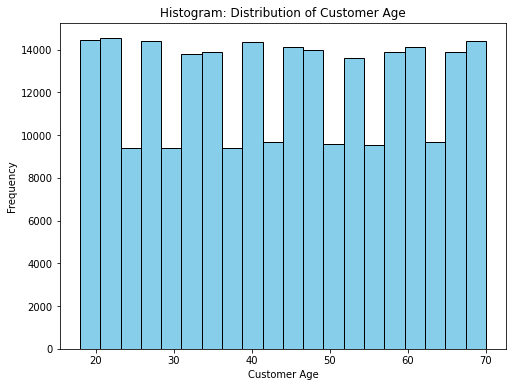

In [0]:
import matplotlib.pyplot as plt

# Collect data for Customer Age
age_data = df_custom_ratios.select('Customer Age').rdd.flatMap(lambda x: x).collect()

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(age_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram: Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()


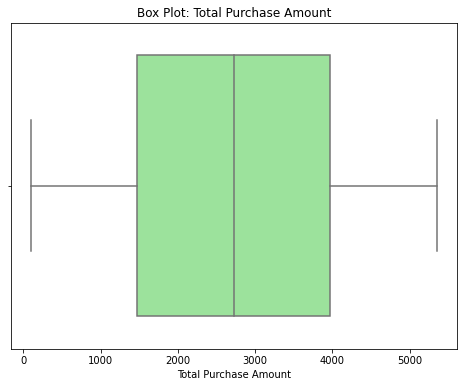

In [0]:
import seaborn as sns

# Collect data for Total Purchase Amount
purchase_amount_data = df_custom_ratios.select('Total Purchase Amount').rdd.flatMap(lambda x: x).collect()

# Plot the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=purchase_amount_data, color='lightgreen')
plt.title('Box Plot: Total Purchase Amount')
plt.xlabel('Total Purchase Amount')
plt.show()


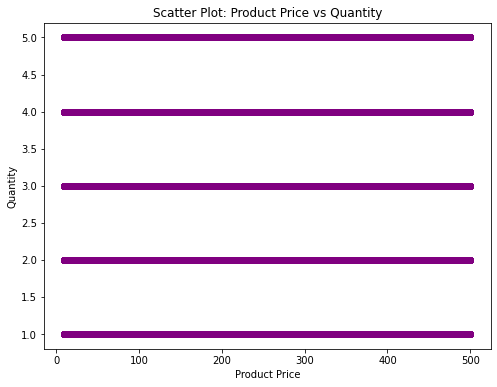

In [0]:
# Collect data for Product Price and Quantity
product_price_data = df_custom_ratios.select('Product Price').rdd.flatMap(lambda x: x).collect()
quantity_data = df_custom_ratios.select('Quantity').rdd.flatMap(lambda x: x).collect()

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(product_price_data, quantity_data, alpha=0.6, color='purple')
plt.title('Scatter Plot: Product Price vs Quantity')
plt.xlabel('Product Price')
plt.ylabel('Quantity')
plt.show()


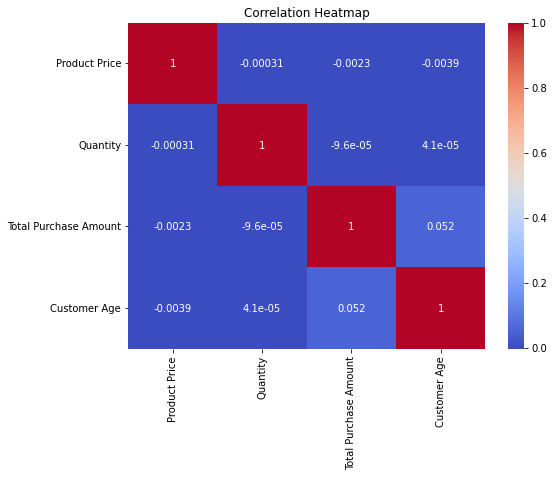

In [0]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# Selecting numerical columns for correlation
numerical_columns = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age']

# Assemble the features into a vector
assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")
df_assembled = assembler.transform(df_custom_ratios)

# Calculate correlation matrix
matrix = Correlation.corr(df_assembled, 'features').head()[0]
corr_matrix = matrix.toArray()

# Plot the heatmap using seaborn
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=numerical_columns, yticklabels=numerical_columns)
plt.title('Correlation Heatmap')
plt.show()


# EDA 

In [0]:
# Show summary statistics for numerical columns
df_custom_ratios.describe(numerical_columns).show()


+-------+------------------+------------------+---------------------+------------------+
|summary|     Product Price|          Quantity|Total Purchase Amount|      Customer Age|
+-------+------------------+------------------+---------------------+------------------+
|  count|            250000|            250000|               250000|            250000|
|   mean|        254.659512|          2.998896|          2725.370732|         43.940528|
| stddev|141.56857683317165|1.4146938844213406|   1442.9335650842957|15.350246304260464|
|    min|                10|                 1|                  100|                18|
|    max|               500|                 5|                 5350|                70|
+-------+------------------+------------------+---------------------+------------------+



In [0]:
from pyspark.sql import functions as F

# List of numerical columns
numerical_columns = ['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age']

# Calculate skewness for each numerical column
for column in numerical_columns:
    skewness = df_custom_ratios.select(F.skewness(col(column)).alias('skewness')).collect()[0]['skewness']
    print(f"Skewness for {column}: {skewness}")


Skewness for Product Price: 0.0014500890735601474
Skewness for Quantity: 0.0007136227506353987
Skewness for Total Purchase Amount: 0.00035190588556467575
Skewness for Customer Age: 0.0036680857403052006


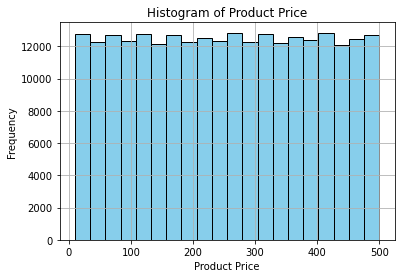

In [0]:
# Histogram for Product Price
import matplotlib.pyplot as plt
import seaborn as sns

df_custom_ratios.select("Product Price").toPandas()['Product Price'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Product Price')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.show()


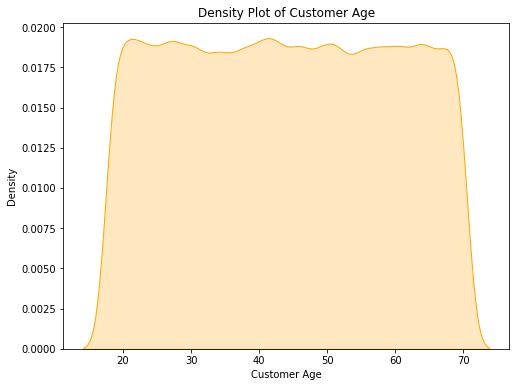

In [0]:
# Density Plot for Customer Age
plt.figure(figsize=(8, 6))
sns.kdeplot(df_custom_ratios.select("Customer Age").toPandas()['Customer Age'], shade=True, color='orange')
plt.title('Density Plot of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Density')
plt.show()


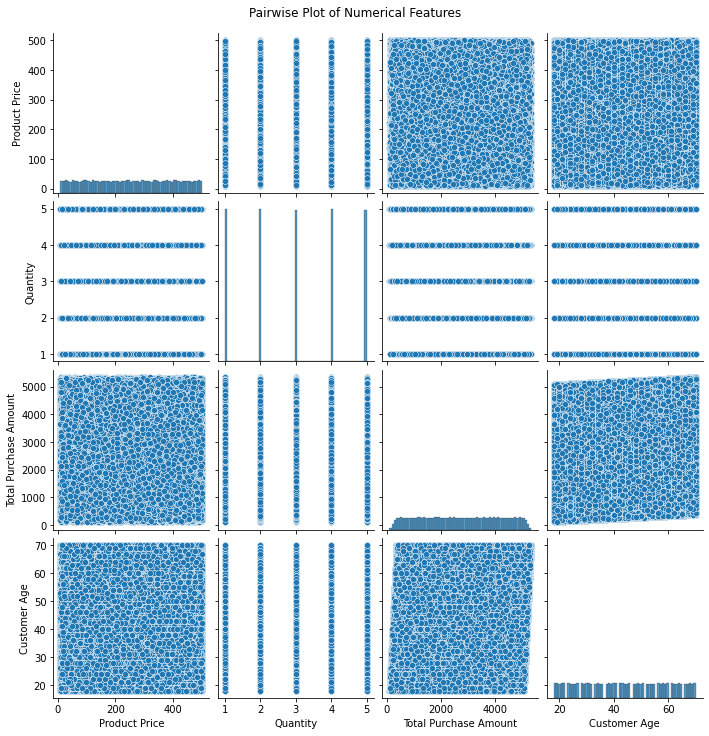

In [0]:
# Pairwise plot for numerical columns
sns.pairplot(df_custom_ratios.toPandas()[numerical_columns])
plt.suptitle('Pairwise Plot of Numerical Features', y=1.02)
plt.show()


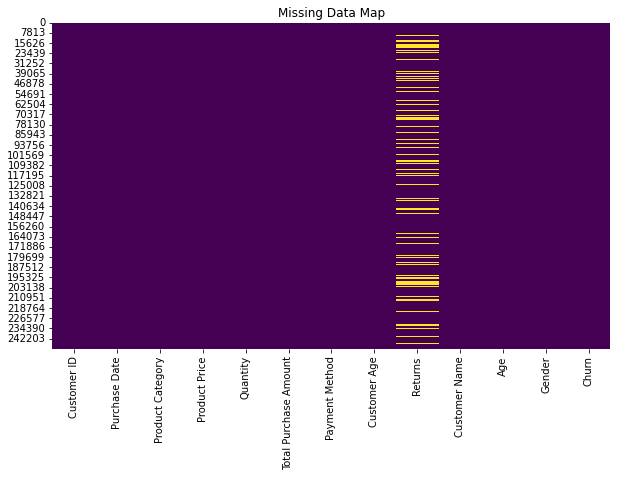

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Missing data map for df_custom_ratios
plt.figure(figsize=(10, 6))
sns.heatmap(df_custom_ratios.toPandas().isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Map')
plt.show()


# Handle Missing Values

In [0]:
df_custom_ratios_cleaned = df_custom_ratios.dropna()
df_large_cleaned = df_large.dropna()

# Show the cleaned datasets (without 'Returns' column)
df_custom_ratios_cleaned.show(5)
df_large_cleaned.show(5)


+-----------+-------------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------------+---+------+-----+
|Customer ID|      Purchase Date|Product Category|Product Price|Quantity|Total Purchase Amount|Payment Method|Customer Age|Returns|      Customer Name|Age|Gender|Churn|
+-----------+-------------------+----------------+-------------+--------+---------------------+--------------+------------+-------+-------------------+---+------+-----+
|      46251|2020-09-08 09:38:32|     Electronics|           12|       3|                  740|   Credit Card|          37|    0.0|Christine Hernandez| 37|  Male|    0|
|      46251|2022-03-05 12:56:35|            Home|          468|       4|                 2739|        PayPal|          37|    0.0|Christine Hernandez| 37|  Male|    0|
|      46251|2022-05-23 18:18:01|            Home|          288|       2|                 3196|        PayPal|          37|    0.0|Christine Hernandez| 37|

In [0]:
from pyspark.sql import functions as F

# Merge datasets on 'Customer ID' with alias for conflicting columns
df_merged = df_custom_ratios_cleaned.alias('df1').join(
    df_large_cleaned.alias('df2'),
    on='Customer ID',
    how='inner'
)

# Select columns with aliases to avoid conflicts
df_merged = df_merged.select(
    'df1.Customer ID',
    'df1.Total Purchase Amount', 
    'df2.Total Purchase Amount',  # This column is present in both datasets
    'df1.Quantity', 
    'df2.Quantity',
    'df1.Age',
    'df2.Age',
    'df1.Product Category',
    'df2.Product Category',
    'df1.Purchase Date',
    'df2.Purchase Date',
    'df1.Customer Age',
    'df2.Customer Age',  # This column is present in both datasets
    'df1.Customer Name',
    'df2.Customer Name',  # This column is present in both datasets
    'df1.Gender',
    'df2.Gender',  # This column is present in both datasets
    'df1.Product Price',
    'df2.Product Price',  # This column is present in both datasets
    'df1.Payment Method',
    'df2.Payment Method',  # This column is present in both datasets
    'df1.Churn',
    'df2.Churn'  # This column is present in both datasets
)

# Show the first few rows of the merged dataset
df_merged.show(5)


+-----------+---------------------+---------------------+--------+--------+---+---+----------------+----------------+-------------------+-------------------+------------+------------+-------------+-------------+------+------+-------------+-------------+--------------+--------------+-----+-----+
|Customer ID|Total Purchase Amount|Total Purchase Amount|Quantity|Quantity|Age|Age|Product Category|Product Category|      Purchase Date|      Purchase Date|Customer Age|Customer Age|Customer Name|Customer Name|Gender|Gender|Product Price|Product Price|Payment Method|Payment Method|Churn|Churn|
+-----------+---------------------+---------------------+--------+--------+---+---+----------------+----------------+-------------------+-------------------+------------+------------+-------------+-------------+------+------+-------------+-------------+--------------+--------------+-----+-----+
|       7340|                 4359|                 1812|       2|       4| 32| 35|            Home|            

In [0]:
df_merged = df_merged.select(
    'df1.Customer ID',
    'df1.Total Purchase Amount',
    'df1.Quantity',
    'df1.Age',
    'df1.Product Category',
    'df1.Purchase Date',
    'df1.Customer Age',  # Keep only this column from df1
    'df1.Customer Name',
    'df1.Gender',
    'df1.Product Price',
    'df1.Payment Method',
    'df1.Churn'
)

df_merged = df_merged.withColumnRenamed('df1.Customer ID', 'Customer ID') \
    .withColumnRenamed('df1.Total Purchase Amount', 'Total Purchase Amount') \
    .withColumnRenamed('df1.Quantity', 'Quantity') \
    .withColumnRenamed('df1.Age', 'Age') \
    .withColumnRenamed('df1.Product Category', 'Product Category') \
    .withColumnRenamed('df1.Purchase Date', 'Purchase Date') \
    .withColumnRenamed('df1.Customer Age', 'Customer Age') \
    .withColumnRenamed('df1.Customer Name', 'Customer Name') \
    .withColumnRenamed('df1.Gender', 'Gender') \
    .withColumnRenamed('df1.Product Price', 'Product Price') \
    .withColumnRenamed('df1.Payment Method', 'Payment Method') \
    .withColumnRenamed('df1.Churn', 'Churn')

# Show the first few rows of the merged dataset
df_merged.show(5)


+-----------+---------------------+--------+---+----------------+-------------------+------------+-------------------+------+-------------+--------------+-----+
|Customer ID|Total Purchase Amount|Quantity|Age|Product Category|      Purchase Date|Customer Age|      Customer Name|Gender|Product Price|Payment Method|Churn|
+-----------+---------------------+--------+---+----------------+-------------------+------------+-------------------+------+-------------+--------------+-----+
|      46251|                  740|       3| 37|     Electronics|2020-09-08 09:38:32|          37|Christine Hernandez|  Male|           12|   Credit Card|    0|
|      46251|                  740|       3| 37|     Electronics|2020-09-08 09:38:32|          37|Christine Hernandez|  Male|           12|   Credit Card|    0|
|      46251|                  740|       3| 37|     Electronics|2020-09-08 09:38:32|          37|Christine Hernandez|  Male|           12|   Credit Card|    0|
|      46251|                  740

In [0]:
# Remove duplicate rows
df_merged_cleaned = df_merged.dropDuplicates()

# Show cleaned dataset
df_merged_cleaned.show(5)


+-----------+---------------------+--------+---+----------------+-------------------+------------+-------------------+------+-------------+--------------+-----+
|Customer ID|Total Purchase Amount|Quantity|Age|Product Category|      Purchase Date|Customer Age|      Customer Name|Gender|Product Price|Payment Method|Churn|
+-----------+---------------------+--------+---+----------------+-------------------+------------+-------------------+------+-------------+--------------+-----+
|      46251|                 2739|       4| 37|            Home|2022-03-05 12:56:35|          37|Christine Hernandez|  Male|          468|        PayPal|    0|
|      13593|                 3452|       1| 49|            Home|2020-11-27 17:55:11|          49|        James Grant|Female|          449|   Credit Card|    1|
|      46251|                  740|       3| 37|     Electronics|2020-09-08 09:38:32|          37|Christine Hernandez|  Male|           12|   Credit Card|    0|
|      46251|                 3196

In [0]:
# Sample 70% of the dataset (adjust the fraction as needed)
df_sampled = df_merged.sample(fraction=0.7, seed=1234)

df_sampled.show(5)


+-----------+---------------------+--------+---+----------------+-------------------+------------+-------------------+------+-------------+--------------+-----+
|Customer ID|Total Purchase Amount|Quantity|Age|Product Category|      Purchase Date|Customer Age|      Customer Name|Gender|Product Price|Payment Method|Churn|
+-----------+---------------------+--------+---+----------------+-------------------+------------+-------------------+------+-------------+--------------+-----+
|      46251|                  740|       3| 37|     Electronics|2020-09-08 09:38:32|          37|Christine Hernandez|  Male|           12|   Credit Card|    0|
|      46251|                  740|       3| 37|     Electronics|2020-09-08 09:38:32|          37|Christine Hernandez|  Male|           12|   Credit Card|    0|
|      46251|                  740|       3| 37|     Electronics|2020-09-08 09:38:32|          37|Christine Hernandez|  Male|           12|   Credit Card|    0|
|      46251|                 2739

In [0]:
from pyspark.sql import functions as F

# Calculate the count of both classes
count_0 = df_merged.filter(df_merged['Churn'] == 0).count()
count_1 = df_merged.filter(df_merged['Churn'] == 1).count()

# Determine the sampling ratio
sampling_ratio = count_1 / count_0

# Sample the majority class and combine with the minority class
df_majority = df_merged.filter(df_merged['Churn'] == 0).sample(False, sampling_ratio)
df_minority = df_merged.filter(df_merged['Churn'] == 1)

df_balanced = df_majority.union(df_minority)

# Check the new class distribution
df_balanced.groupBy('Churn').count().show()

+-----+------+
|Churn| count|
+-----+------+
|    0|162620|
|    1|162635|
+-----+------+



In [0]:
train_df, test_df = df_balanced.randomSplit([0.8, 0.2], seed=1234)

print(f"Training set count: {train_df.count()}")
print(f"Test set count: {test_df.count()}")

Training set count: 260521
Test set count: 64734


In [0]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline

categorical_cols = ['Gender', 'Product Category', 'Payment Method']
numerical_cols = ['Quantity', 'Total Purchase Amount', 'Product Price', 'Age',]

# StringIndexer and OneHotEncoder for categorical columns
indexers = [
    StringIndexer(inputCol=col, outputCol=col + '_indexed', handleInvalid="keep") 
    for col in categorical_cols
]

encoders = [
    OneHotEncoder(inputCol=col + '_indexed', outputCol=col + '_encoded', handleInvalid="keep") 
    for col in categorical_cols
]

# VectorAssembler to combine categorical and numerical features
assembler = VectorAssembler(
    inputCols=[col + '_encoded' for col in categorical_cols] + numerical_cols,
    outputCol='features'
)

# StandardScaler to scale the features
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

def evaluate_model(model, test_df, label_col="Churn", prediction_col="prediction"):
    """
    Evaluates the classification model based on common metrics and includes the confusion matrix.
    
    Parameters:
    - model: The trained model (e.g., LogisticRegressionModel).
    - test_df: The DataFrame used for evaluation (with actual values and predictions).
    - label_col: The name of the label column (default is "Churn").
    - prediction_col: The name of the prediction column (default is "prediction").
    
    Returns:
    - A dictionary with evaluation metrics and the confusion matrix.
    """
    
    # Make predictions
    predictions = model.transform(test_df)
    
    # Convert to RDD for confusion matrix calculation
    prediction_and_labels = predictions.select(prediction_col, label_col).rdd.map(lambda row: (row[prediction_col], row[label_col]))
    
    # Binary Classification Evaluation (For binary classification problems)
    evaluator_binary = BinaryClassificationEvaluator(labelCol=label_col, rawPredictionCol=prediction_col)
    
    # AUC (Area Under ROC Curve)
    auc = evaluator_binary.evaluate(predictions, {evaluator_binary.metricName: "areaUnderROC"})
    
    # Accuracy Evaluation
    evaluator_accuracy = MulticlassClassificationEvaluator(labelCol=label_col, predictionCol=prediction_col, metricName="accuracy")
    accuracy = evaluator_accuracy.evaluate(predictions)
    
    # Precision, Recall, F1-score
    evaluator_precision = MulticlassClassificationEvaluator(labelCol=label_col, predictionCol=prediction_col, metricName="weightedPrecision")
    precision = evaluator_precision.evaluate(predictions)
    
    evaluator_recall = MulticlassClassificationEvaluator(labelCol=label_col, predictionCol=prediction_col, metricName="weightedRecall")
    recall = evaluator_recall.evaluate(predictions)
    
    evaluator_f1 = MulticlassClassificationEvaluator(labelCol=label_col, predictionCol=prediction_col, metricName="f1")
    f1_score = evaluator_f1.evaluate(predictions)
    
    # Return evaluation metrics and confusion matrix
    evaluation_metrics = {
        "AUC": auc,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
    }
    
    return evaluation_metrics

In [0]:
# Logistic Regression Model
lr = LogisticRegression(featuresCol='scaled_features', labelCol='Churn')

# Define the pipeline with all stages
pipeline_lr = Pipeline(stages=indexers + encoders + [assembler, scaler, lr])

# Fit the pipeline with the training data
model_lr = pipeline_lr.fit(train_df)

evaluation_results = evaluate_model(model_lr, test_df)
print(evaluation_results)

{'AUC': 0.5022708314023542, 'Accuracy': 0.5022708314023543, 'Precision': 0.5022708970306374, 'Recall': 0.5022708314023543, 'F1-Score': 0.5022672353182531}


In [0]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml import Pipeline

# Decision Tree Model
dt = DecisionTreeClassifier(featuresCol='scaled_features', labelCol='Churn')

# Define the pipeline with all stages (using the Decision Tree model instead of Logistic Regression)
pipeline_dt = Pipeline(stages=indexers + encoders + [assembler, scaler, dt])

# Fit the pipeline with the training data
model_dt = pipeline_dt.fit(train_df)

# Evaluate the Decision Tree model on the test data
evaluation_results = evaluate_model(model_dt, test_df)
print(evaluation_results)



{'AUC': 0.5116013223344765, 'Accuracy': 0.5116013223344765, 'Precision': 0.5119009817468798, 'Recall': 0.5116013223344764, 'F1-Score': 0.5085074521982267}


In [0]:
# Random Forest Model
rf = RandomForestClassifier(featuresCol='scaled_features', labelCol='Churn', maxDepth=10)

# Define the pipeline with all stages (using the Random Forest model instead of Decision Tree)
pipeline_rf = Pipeline(stages=indexers + encoders + [assembler, scaler, rf])

# Fit the pipeline with the training data
model_rf = pipeline_rf.fit(train_df)

# Evaluate the Random Forest model on the test data
evaluation_results = evaluate_model(model_rf, test_df)
print(evaluation_results)


{'AUC': 0.5761423672258782, 'Accuracy': 0.5761423672258782, 'Precision': 0.5768509759776848, 'Recall': 0.5761423672258782, 'F1-Score': 0.5751630589911427}


In [0]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml import Pipeline

# Gradient Boosting Model
gbt = GBTClassifier(featuresCol='scaled_features', labelCol='Churn')

# Define the pipeline with all stages (using the Gradient Boosting model instead of Random Forest)
pipeline_gbt = Pipeline(stages=indexers + encoders + [assembler, scaler, gbt])

# Fit the pipeline with the training data
model_gbt = pipeline_gbt.fit(train_df)

# Evaluate the Gradient Boosting model on the test data
evaluation_results = evaluate_model(model_gbt, test_df)
print(evaluation_results)


{'AUC': 0.5298915562146631, 'Accuracy': 0.5298915562146631, 'Precision': 0.5302391108385935, 'Recall': 0.5298915562146631, 'F1-Score': 0.5285368603451777}


In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline

# Define the Logistic Regression model
lr = LogisticRegression(featuresCol='scaled_features', labelCol='Churn')

# Parameter grid for hyperparameter tuning
paramGrid_lr = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 0.5]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

# Define the evaluator for binary classification
evaluator = BinaryClassificationEvaluator(labelCol="Churn", metricName="areaUnderROC")

# Cross-validation with 3 folds
cv = CrossValidator(estimator=lr,
                    estimatorParamMaps=paramGrid_lr,
                    evaluator=evaluator,
                    numFolds=3)

# Define the pipeline with preprocessing stages and the cross-validation
pipeline = Pipeline(stages=indexers + encoders + [assembler, scaler, cv])

# Train the cross-validated logistic regression model
cv_model = pipeline.fit(train_df)


In [0]:
# Evaluate the Gradient Boosting model on the test data
evaluation_results = evaluate_model(model_gbt, test_df)
print(evaluation_results)
cv_model = pipeline.fit(train_df)

{'AUC': 0.5298915562146631, 'Accuracy': 0.5298915562146631, 'Precision': 0.5302391108385935, 'Recall': 0.5298915562146631, 'F1-Score': 0.5285368603451777}
